In [1]:
import pandas as pd
import numpy as np
# import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\yashi_l2ryogo\Downloads\final (1).csv")
df.head()

C:\Users\yashi_l2ryogo\AppData\Local\Temp\ipykernel_31056\3933484328.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\yashi_l2ryogo\Downloads\final (1).csv")


,Unnamed: 0,Year,FlightDate,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,DestAirportID,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,19038,2024,2024-01-15,20409,N945JT,616,14771,"San Francisco, CA",91,12478,...,10.6,7.2,15.0,0.0,NaN,54.0,9.0,NaN,1020.4,NaN
1,19039,2024,2024-01-28,19805,N990AU,341,11298,"Dallas/Fort Worth, TX",74,14492,...,7.8,1.1,16.7,0.0,0.0,282.0,10.1,NaN,1028.9,NaN
2,19040,2024,2024-01-02,19393,N7884G,3257,10821,"Baltimore, MD",35,14107,...,5.5,2.8,7.8,0.0,0.0,310.0,15.4,NaN,1019.9,NaN
3,19041,2024,2024-01-07,20304,N311SY,3848,13487,"Minneapolis, MN",63,13232,...,-4.3,-5.0,-1.7,0.0,0.0,317.0,10.2,NaN,1015.0,NaN
4,19042,2024,2024-01-31,20452,N642RW,3493,12264,"Washington, DC",38,10785,...,4.9,2.8,6.7,0.0,0.0,33.0,6.8,NaN,1019.2,NaN


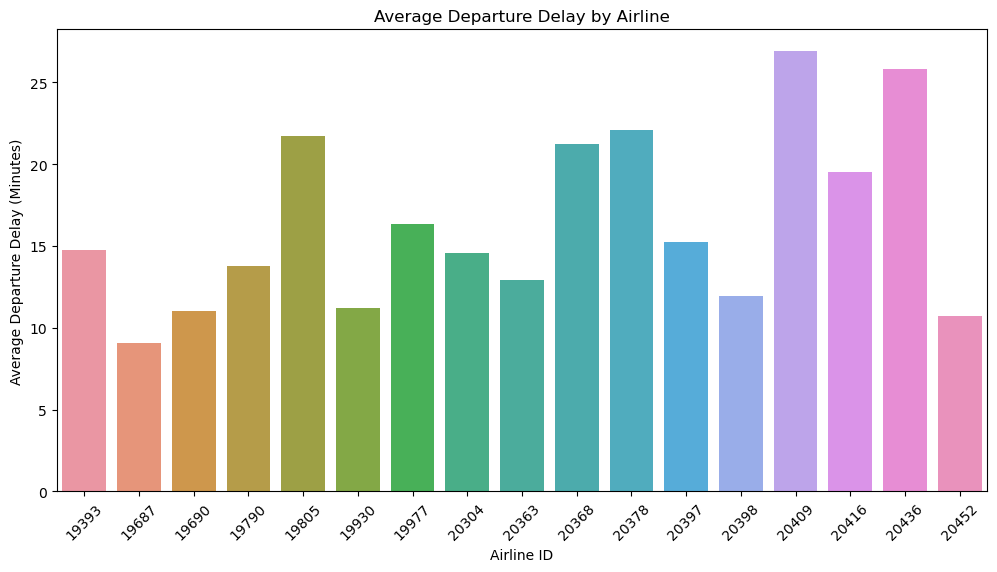

In [3]:
# Average delays by airline
avg_delay_by_airline = df.groupby('DOT_ID_Reporting_Airline')['DepDelayMinutes'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delay_by_airline.index, y=avg_delay_by_airline.values)
plt.title('Average Departure Delay by Airline')
plt.xlabel('Airline ID')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

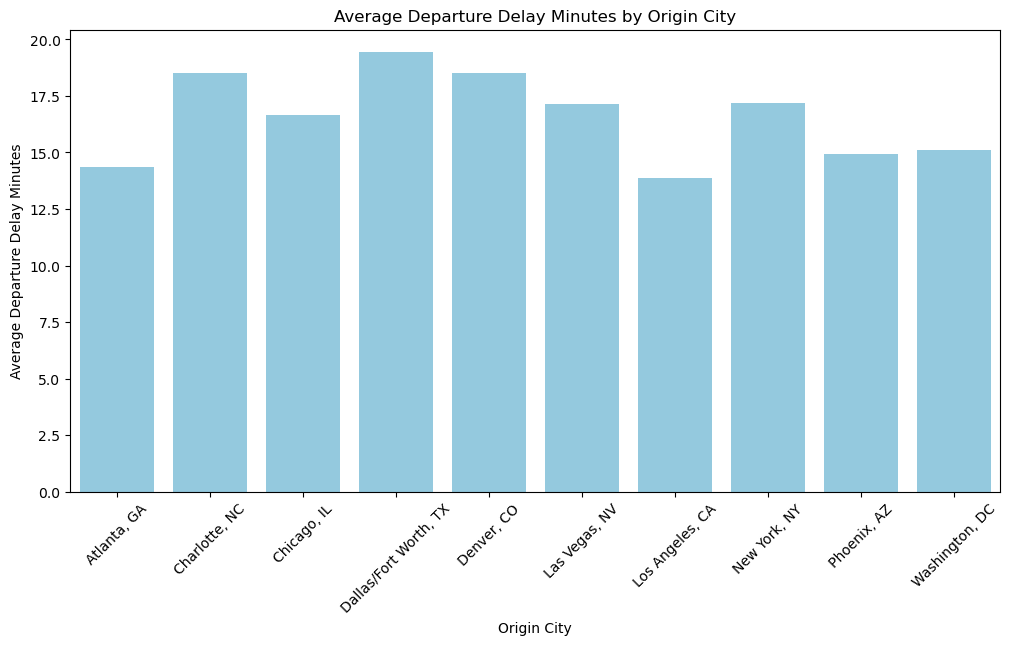

In [4]:
origin_cities = df['OriginCityName'].value_counts().head(10).index
filtered_df = df[df['OriginCityName'].isin(origin_cities)]
city_delays = filtered_df.groupby('OriginCityName')['DepDelayMinutes'].mean()  # Use .sum() for total delays
plt.figure(figsize=(12, 6))
sns.barplot(x=city_delays.index, y=city_delays.values, color='skyblue')
plt.title('Average Departure Delay Minutes by Origin City')
plt.xlabel('Origin City')
plt.ylabel('Average Departure Delay Minutes')
plt.xticks(rotation=45)
plt.show()

C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


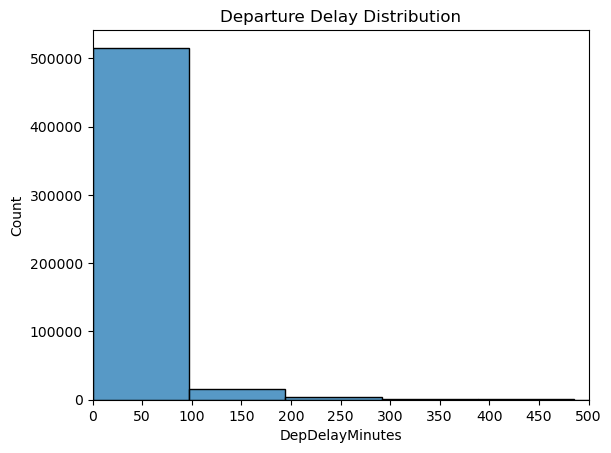

In [5]:
sns.histplot(df['DepDelayMinutes'], bins=30)
plt.xlim(0, 500)  # Set x-axis limit up to 500
plt.xticks(range(0, 501, 50))
plt.title('Departure Delay Distribution')
plt.show()

C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


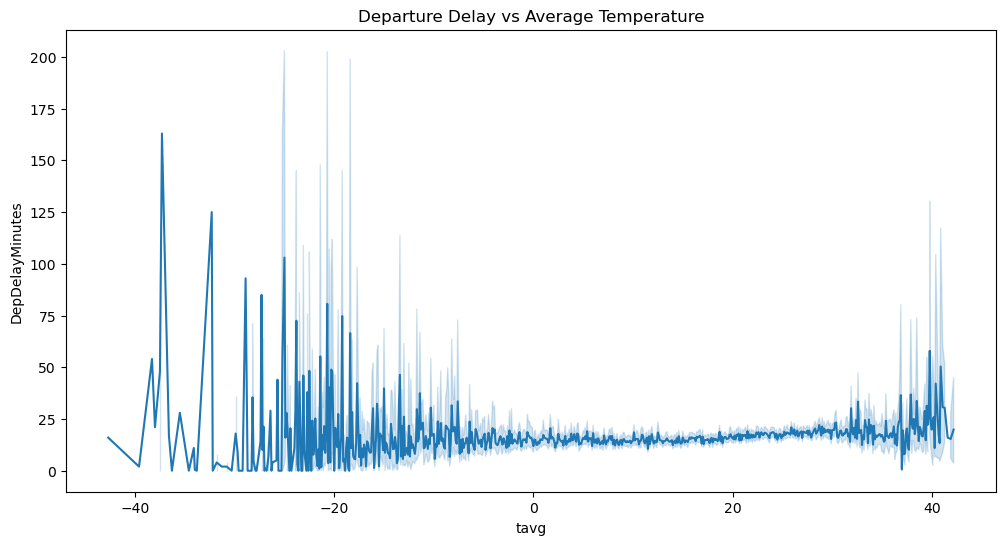

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='tavg', y='DepDelayMinutes')
plt.title('Departure Delay vs Average Temperature')
plt.show()

C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


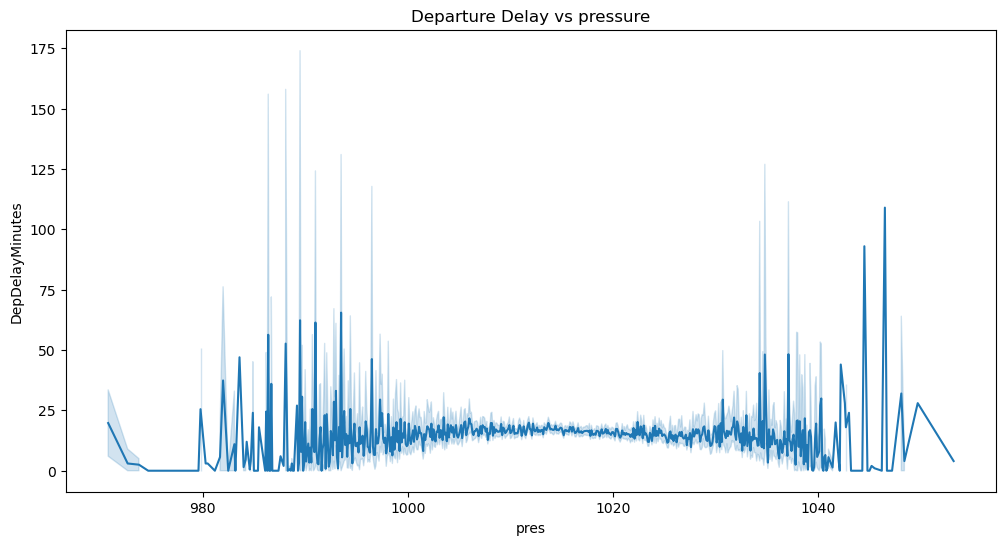

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='pres', y='DepDelayMinutes')
plt.title('Departure Delay vs pressure')
plt.show()

C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


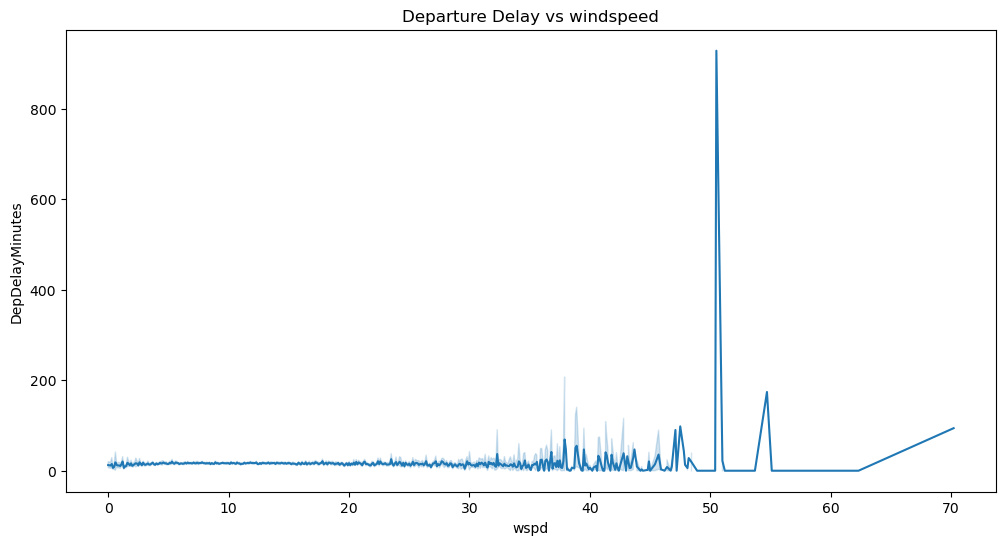

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='wspd', y='DepDelayMinutes')
plt.title('Departure Delay vs windspeed')
plt.show()

C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


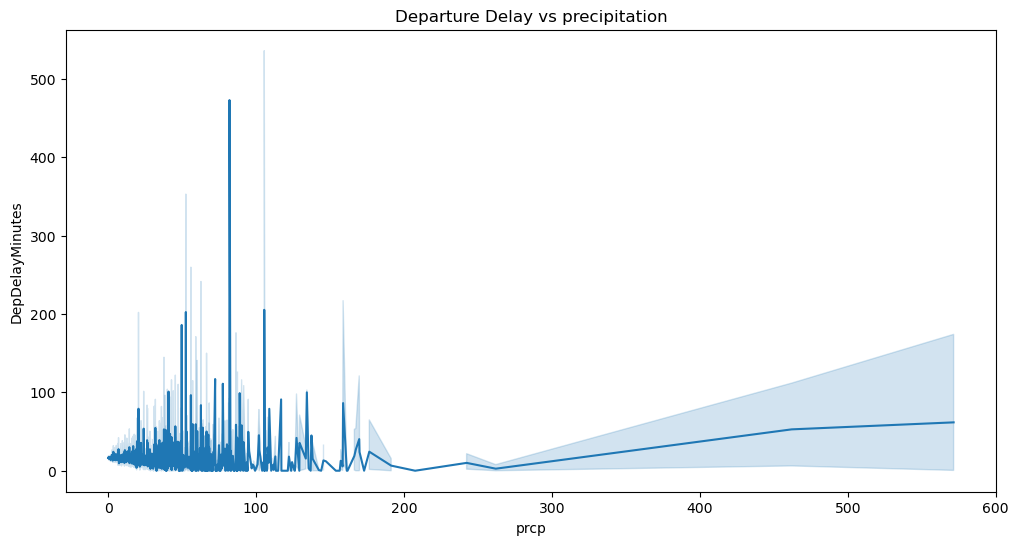

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='prcp', y='DepDelayMinutes')
plt.title('Departure Delay vs precipitation')
plt.show()

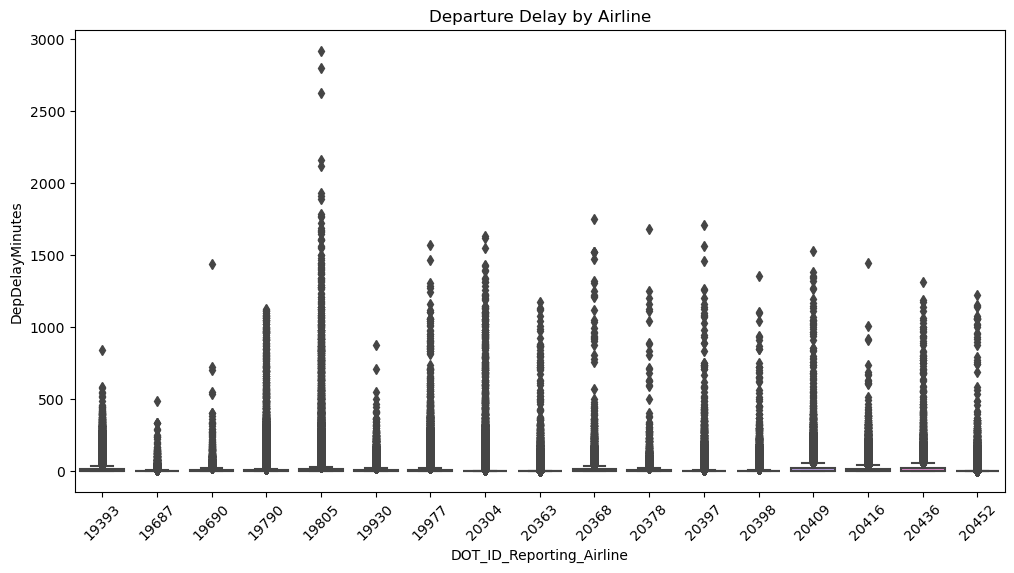

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DOT_ID_Reporting_Airline', y='DepDelayMinutes', data=df)
plt.title('Departure Delay by Airline')
plt.xticks(rotation=45)
plt.show()

C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

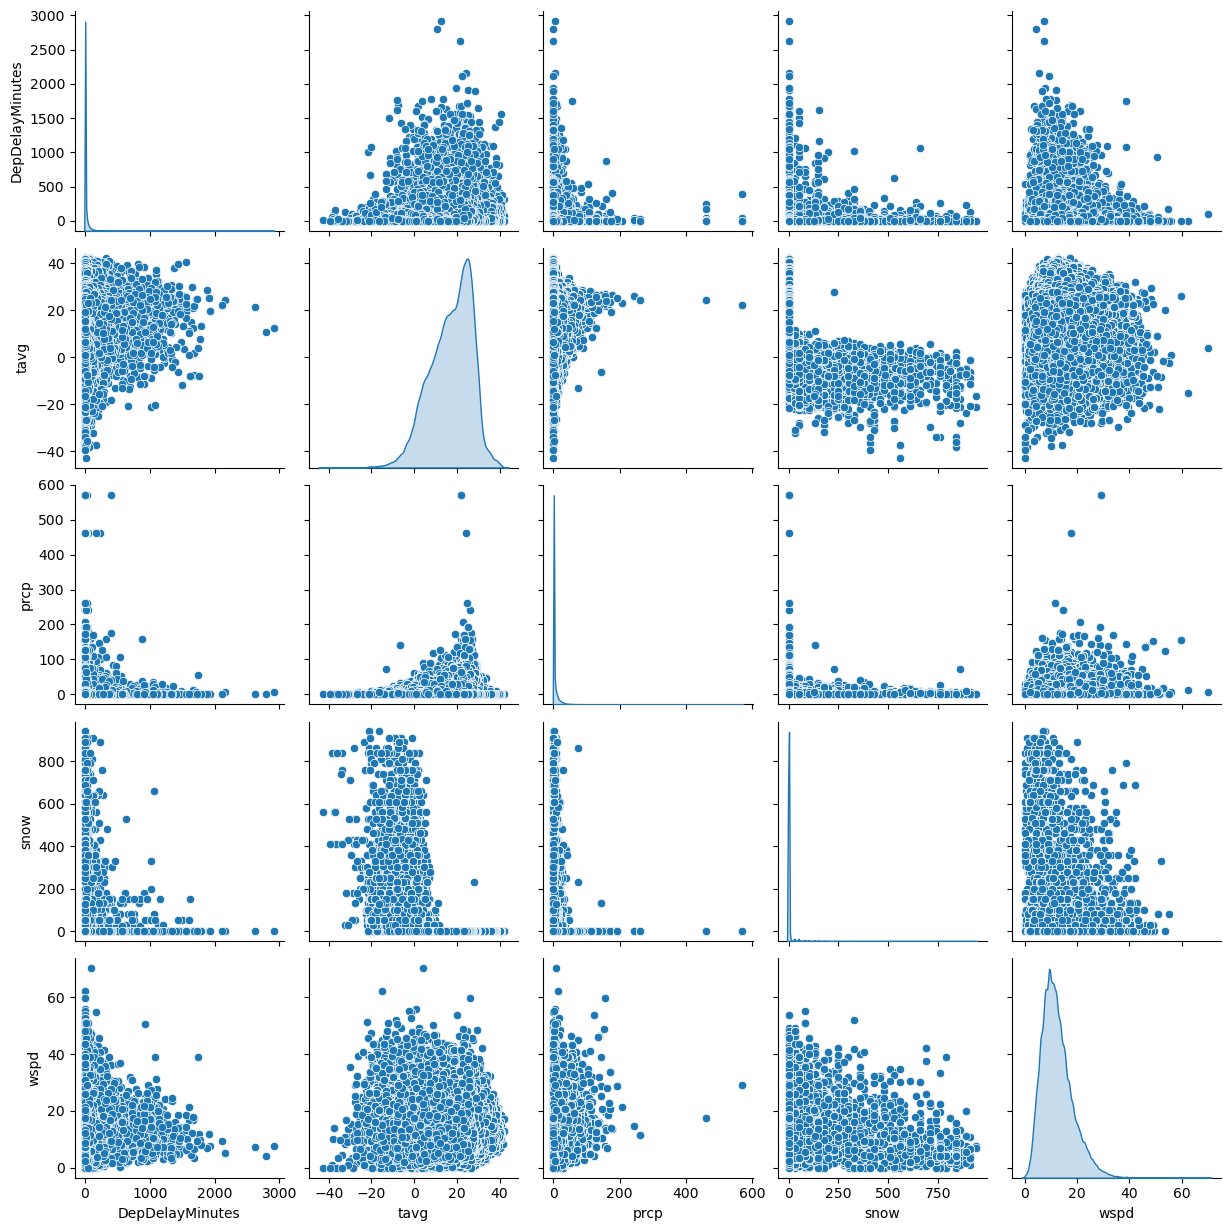

In [11]:
sns.pairplot(df[['DepDelayMinutes', 'tavg', 'prcp','snow','wspd']], diag_kind='kde')
plt.show()
